# Datasource and description
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


In [33]:
# Libraries import
import pandas as pd
import requests,zipfile,io #archives
import matplotlib.pyplot as plt #visuals

In [34]:
# Create an archive object by datasource link
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip') 
z = zipfile.ZipFile(io.BytesIO(r.content))

In [35]:
# Looking for the file we need in zip
z.namelist()

['bank-full.csv', 'bank-names.txt', 'bank.csv']

In [67]:
# Read the dataset
df = pd.read_csv(z.open('bank-full.csv'), sep = ';')
df.sample(n = 10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21019,40,technician,single,tertiary,no,539,no,no,cellular,14,aug,121,2,-1,0,unknown,no
28120,30,technician,single,secondary,no,486,no,no,cellular,28,jan,335,3,-1,0,unknown,no
17096,32,services,married,secondary,no,194,yes,yes,cellular,25,jul,150,2,-1,0,unknown,no
25840,33,blue-collar,married,tertiary,no,6138,yes,no,cellular,19,nov,384,1,183,1,failure,no
18445,54,self-employed,married,secondary,no,2191,yes,no,telephone,31,jul,96,6,-1,0,unknown,no
42500,45,technician,married,tertiary,no,115,no,no,cellular,16,dec,147,1,194,1,other,no
22191,31,technician,single,tertiary,no,176,no,no,cellular,21,aug,241,4,-1,0,unknown,no
20774,60,housemaid,married,unknown,no,2769,no,no,cellular,13,aug,96,2,-1,0,unknown,no
10567,55,retired,married,tertiary,no,2929,no,no,unknown,16,jun,556,3,-1,0,unknown,no
36199,50,blue-collar,married,secondary,no,372,yes,no,telephone,11,may,21,1,-1,0,unknown,no


In [68]:
# Convert months names to a numbers
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month

In [69]:
# Prepate pivot table for linear chart: count of clients by month
data = df.groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data.head()

,month,count
0,1,1403
1,2,2649
2,3,477
3,4,2932
4,5,13766


In [89]:
# Select visualizations style
plt.style.use('fivethirtyeight')

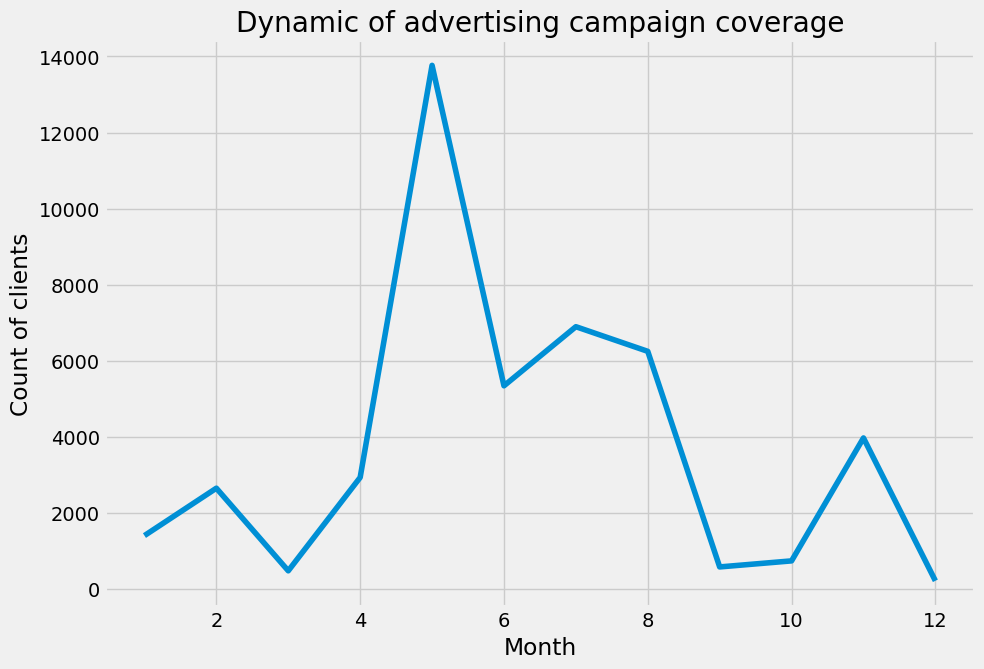

In [94]:
# Create linear chart

plt.figure(figsize = (10,7))

plt.plot(data['month'], data['count'])

plt.title('Dynamic of advertising campaign coverage')
plt.xlabel('Month')
plt.ylabel('Count of clients')

plt.show()

In [102]:
# Marital data 
data1 = df[df['marital'] == 'single'].groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data2 = df[df['marital'] == 'single'].groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data3 = df[df['marital'] == 'single'].groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data1.head()

,month,count
0,1,537
1,2,926
2,3,183
3,4,918
4,5,4213


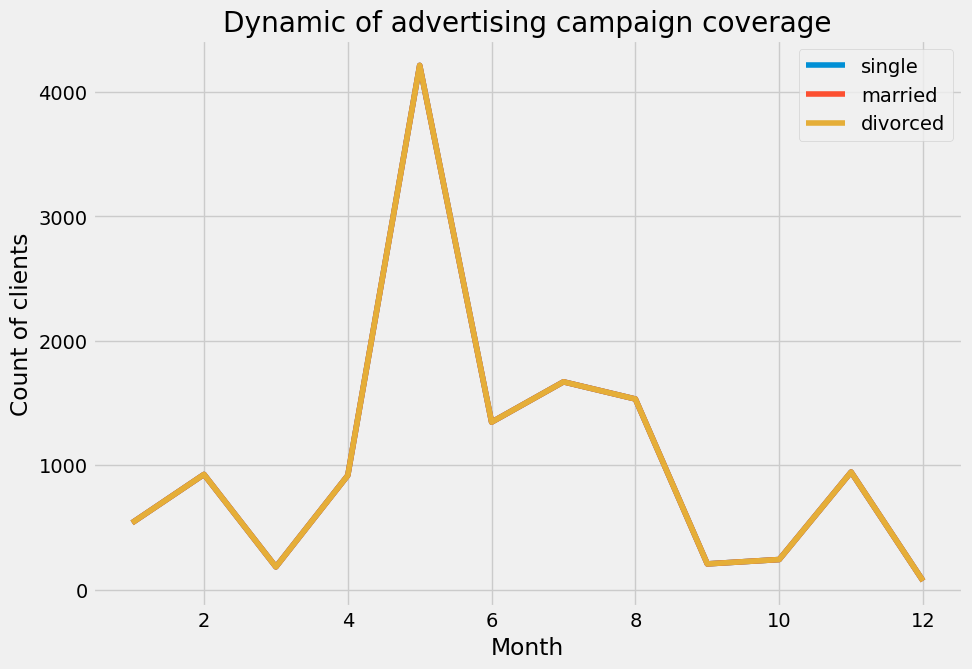

In [103]:
# Linear chart with marital data

plt.figure(figsize = (10,7))

plt.plot(data1['month'], data1['count'])
plt.plot(data2['month'], data2['count'])
plt.plot(data3['month'], data3['count'])

plt.title('Dynamic of advertising campaign coverage')
plt.xlabel('Month')
plt.ylabel('Count of clients')
plt.legend(['single','married','divorced'])

plt.show()

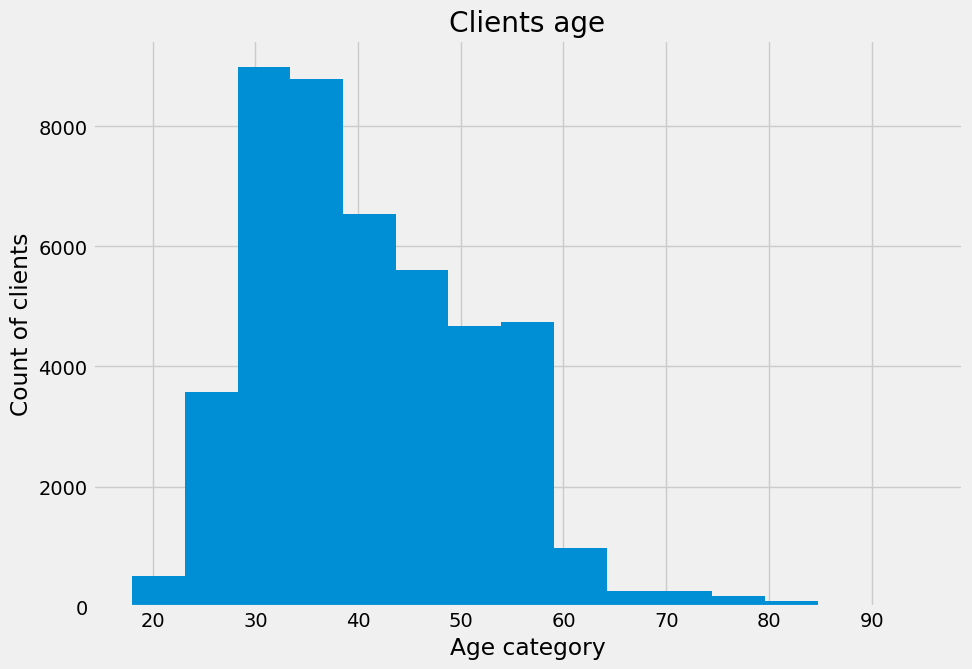

In [110]:
# Age histogram

plt.figure(figsize = (10,7))

plt.hist(df['age'], bins = 15)

plt.title('Clients age')
plt.xlabel('Age category')
plt.ylabel('Count of clients')

plt.show()

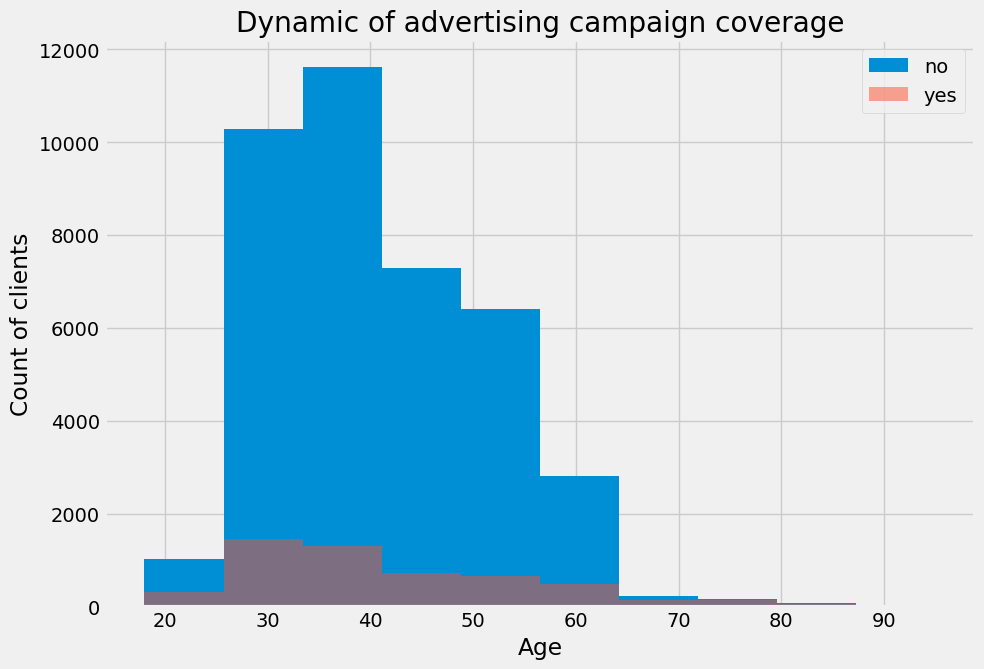

In [129]:
# Product subscription histogram

plt.figure(figsize = (10,7))

plt.hist(df['age'].loc[df['y'] == 'no'], label = 'no')
plt.hist(df['age'].loc[df['y'] == 'yes'], alpha = 0.5, label = 'yes')


plt.title('Dynamic of advertising campaign coverage')
plt.xlabel('Age')
plt.ylabel('Count of clients')
plt.legend()

plt.show()

In [130]:
# Recode y variable 
df['convert'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [131]:
# Prepare pivot table for visualization: count of subscriptions by age
data = df.groupby('age')['convert'].sum().reset_index()
data.tail()

,age,convert
72,90,2
73,92,2
74,93,2
75,94,0
76,95,1


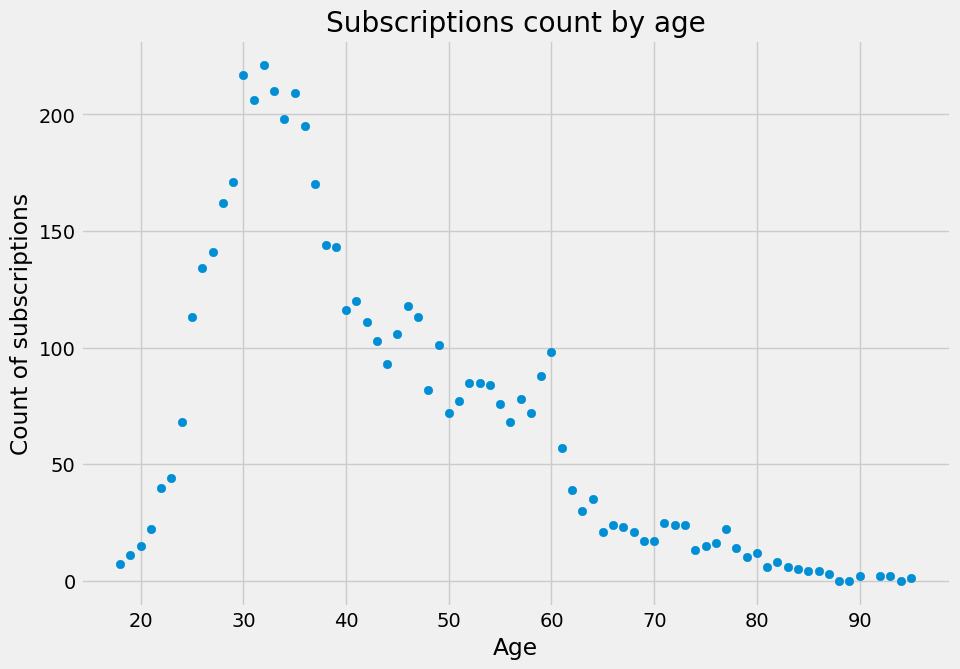

In [132]:
# Create scatterplot: subscriptions count distribution by age 

plt.figure(figsize = (10,7))

plt.scatter(data['age'], data['convert'])

plt.title('Subscriptions count by age')
plt.xlabel('Age')
plt.ylabel('Count of subscriptions')

plt.show()

In [145]:
# Prepare jobs pivot table
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


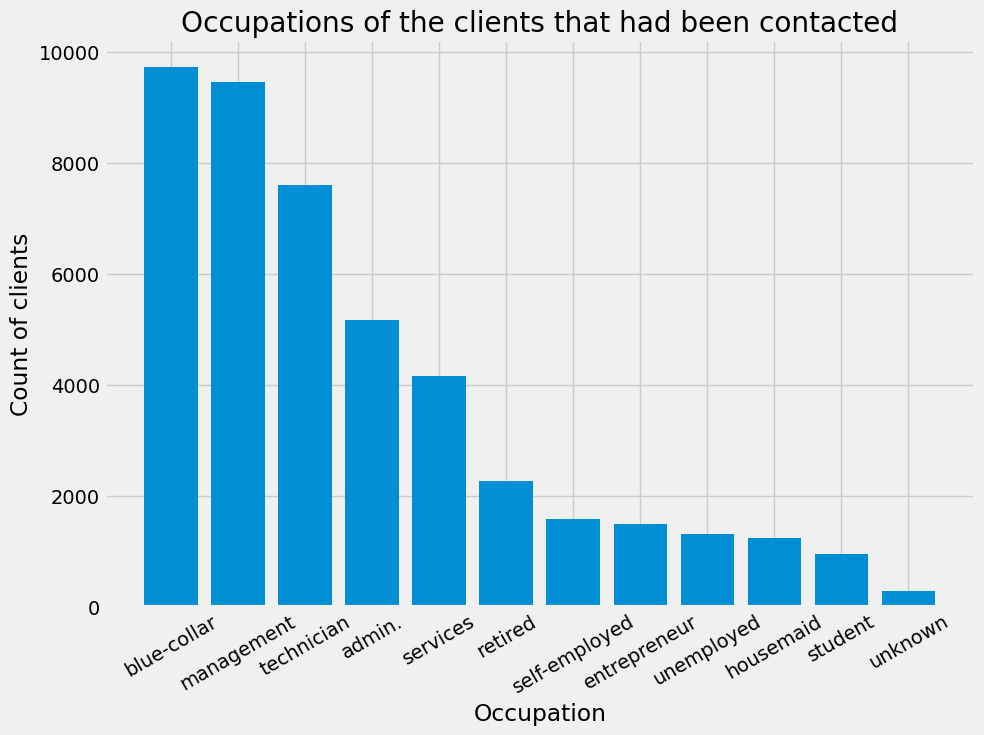

In [146]:
# Create bar chart

plt.figure(figsize = (10,7))

plt.bar(data['index'],data['job'])

plt.title('Occupations of bank clients that had been contacted')
plt.xlabel('Occupation')
plt.ylabel('Count of clients')
plt.xticks(rotation = 30)

plt.show()

In [147]:
# Occupation data in the subscription slice
data = pd.crosstab(df['job'],df['y']).reset_index().sort_values(by = 'no', ascending = False)
data.head()

y,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


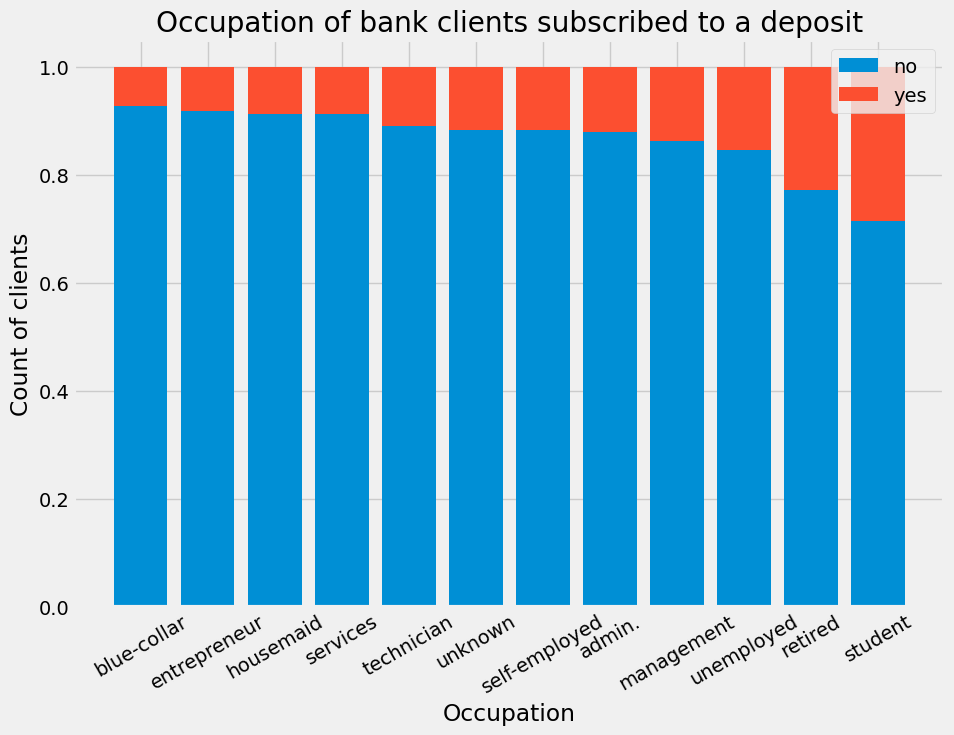

In [156]:
# Create stacked column chart: subscriptions count by cliens' occupations

plt.figure(figsize = (10,7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom = data['no'])

plt.title('Occupation of bank clients subscribed to a deposit')
plt.xlabel('Occupation')
plt.ylabel('Count of clients')
plt.legend(['no','yes'])
plt.xticks(rotation = 30)

plt.show()

In [154]:
# Prepare normalized data for subscriptions count by cliens' occupations
data = pd.crosstab(df['job'],df['y'], normalize = 'index').reset_index().sort_values(by = 'no', ascending = False)
data.head()

y,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


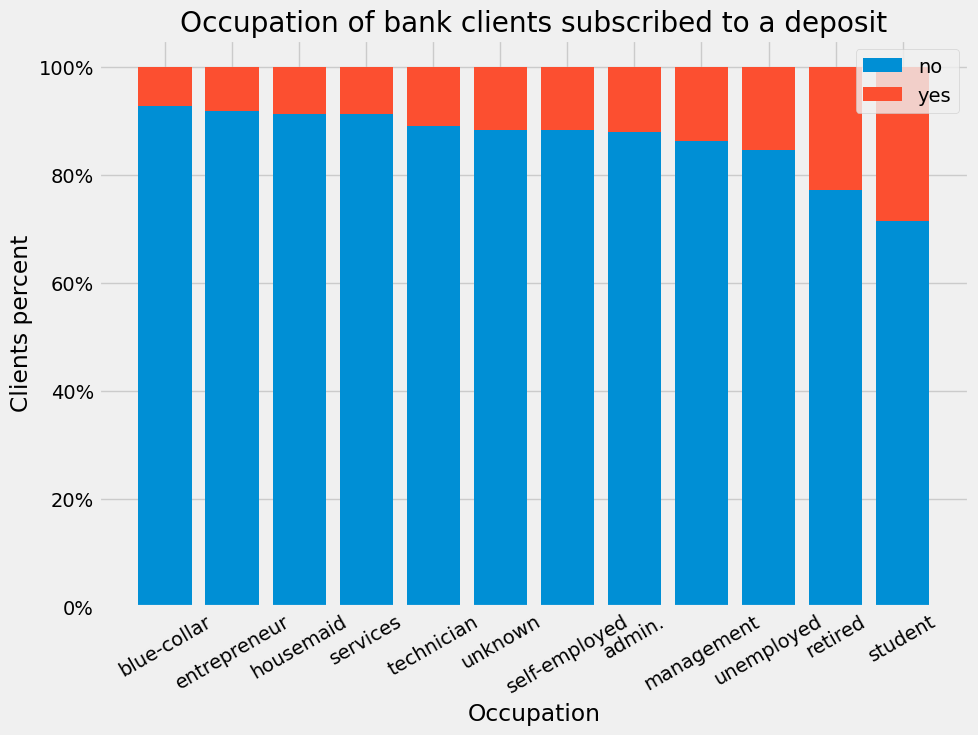

In [157]:
# Create 100% stacked column chart: subscriptions count by cliens' occupations

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom = data['no'])

plt.title('Occupation of bank clients subscribed to a deposit')
plt.xlabel('Occupation')
plt.ylabel('Clients percent')
plt.legend(['no','yes'])
plt.xticks(rotation = 30)

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1));

plt.show()

In [158]:
# Prepare pie chart data
data = df['y'].value_counts()
data.head()

no     39922
yes     5289
Name: y, dtype: int64

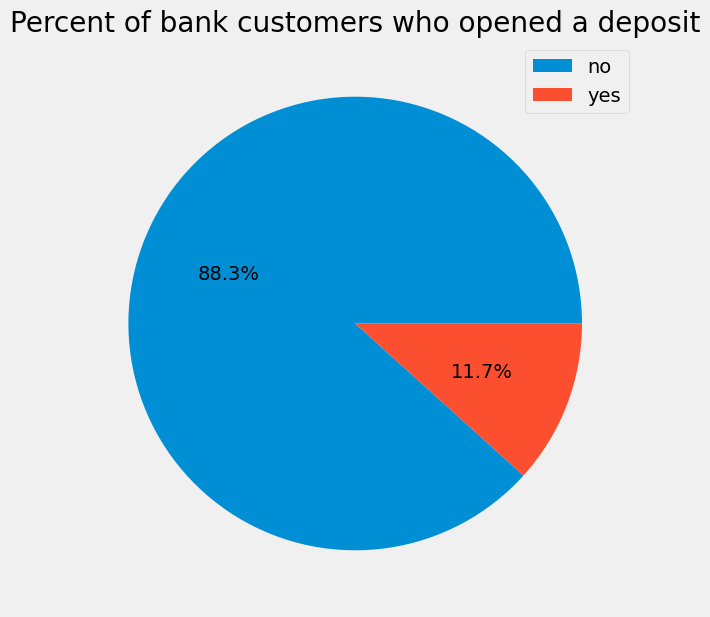

In [159]:
# Create pie chart

plt.figure(figsize = (10,7))

plt.pie(data, autopct='%1.1f%%')

plt.title('Percent of bank customers who opened a deposit')
plt.legend(data.index)

plt.show()